In [4]:
variant_task = (21 + 4) % 5 + 1
print(variant_task)

1


In [6]:
# Варіант 1

# Номери вправ: 1+, 2+, 3+, 5+, 10+, 11+, 12+, 13+, 14+, 15+, 16+, 17+, 18+, 21+, 22+, 23+, 24+, 26+

In [7]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

print(data.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [8]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

print(data.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [9]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
column_names = data.columns

print(column_names)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [10]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
unique_names = data['Name'].unique()
num_unique_names = len(unique_names)

print("Кількість унікальних імен:", num_unique_names)

Кількість унікальних імен: 93889


In [11]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
unique_names_by_year = data.groupby('Year')['Name'].nunique()

print(unique_names_by_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [22]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
unique_names_per_year = data.groupby('Year')['Name'].nunique()
year_max_names = unique_names_per_year.idxmax()
max_names = unique_names_per_year.max()
result_df = pd.DataFrame({'Year': [year_max_names], 'Name': [max_names]})

result_df

,Year,Name
0,2008,32488


In [27]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
unique_names_per_year = df.groupby('Year')['Name'].nunique().idxmax()
data_2008 = df[df['Year'] == unique_names_per_year]
most_popular_name = data_2008.groupby('Name')['Count'].sum().idxmax()

print(f"Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен ({most_popular_name})")

Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен (Jacob)


In [30]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
female_name = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
most_popular_year = female_name.loc[female_name['Count'].idxmax()]

most_popular_year

Id        1455557
Name        Jacob
Year         2004
Gender          F
Count         171
Name: 1455556, dtype: object

In [32]:
import pandas as pd

df = pd.read_csv("NationalNames.csv")
name_year_gender_counts = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
gender_neutral_names = name_year_gender_counts[name_year_gender_counts['Gender'] == 2]
neutral_names_per_year = gender_neutral_names.groupby('Year').size().reset_index(name='Count')
year_with_most_neutral_names = neutral_names_per_year.loc[neutral_names_per_year['Count'].idxmax()]

print(year_with_most_neutral_names)

Year     2008
Count    2557
Name: 128, dtype: int64


In [38]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
births_per_year = data.groupby('Year')['Count'].sum()

births_per_year

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [37]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
total_births_by_year = data.pivot_table(values='Count', index='Year', aggfunc='sum')
max_birth_year = total_births_by_year['Count'].idxmax()

print(f"Найбільше дітей народилося в {max_birth_year} році.")

Найбільше дітей народилося в 1957 році.


In [41]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
births_by_year_gender = data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')

print(births_by_year_gender)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [44]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
births_by_year_gende = data.pivot_table(values='Count', index='Year', columns='Gender', aggfunc='sum')
years_more_girls = (births_by_year_gende['F'] > births_by_year_gende['M']).sum()

print(f"Кількість років, коли народилося більше дівчаток: {years_more_girls}")

Кількість років, коли народилося більше дівчаток: 54


In [49]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
barbara_boys = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]
count_barbara_boys = barbara_boys['Count'].sum()

print(f"Кількість випадків, коли хлопчиків називали Barbara: {count_barbara_boys}")

Кількість випадків, коли хлопчиків називали Barbara: 4139


In [52]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
earliest_year = data['Year'].min()
latest_year = data['Year'].max()
years_of_observation = latest_year - earliest_year + 1

print("Спостереження проводилось:", years_of_observation)

Спостереження проводилось: 135


In [1]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")

grouped_data = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
gender_neutral_names_each_year = grouped_data[grouped_data['Gender'] > 1]['Name'].unique()

gender_neutral_data = data[data['Name'].isin(gender_neutral_names_each_year)]

popular_gender_neutral_names = gender_neutral_data['Name'].value_counts().head(15)

popular_gender_neutral_names_df = pd.DataFrame(popular_gender_neutral_names.index, columns=['Name']).reset_index(drop=True)

display(popular_gender_neutral_names_df)

,Name
0,John
1,Sidney
2,Francis
3,Ollie
4,Jesse
5,Marion
6,Leslie
7,Johnnie
8,Tommie
9,Joseph


In [5]:
import pandas as pd

data = pd.read_csv("NationalNames.csv")
names_count = data.groupby('Name').sum()['Count']
unpopular_names = names_count[names_count < 161]

most_popular_unpopular_name = unpopular_names.idxmax()
most_popular_unpopular_count = unpopular_names.max()

print(f"Найбільш популярне з непопулярних імен - це {most_popular_unpopular_name}.")
print(f"Їм називали {most_popular_unpopular_count} разів.")

Найбільш популярне з непопулярних імен - це Adriyana.
Їм називали 160 разів.


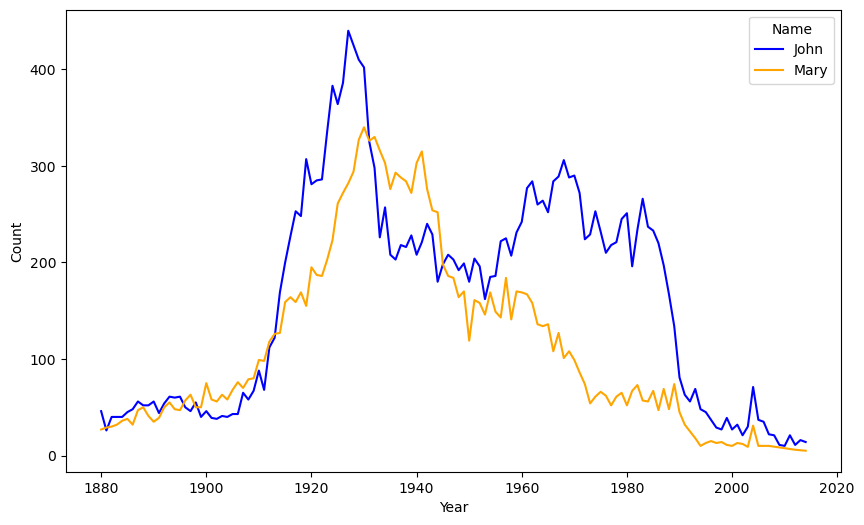

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')
plt.figure(figsize=(10, 6))

john_female = df[(df['Name'] == 'John') &
                 (df['Gender'] == 'F')].groupby('Year')['Count'].sum().reset_index()


mary_male = df[(df['Name'] == 'Mary') &
               (df['Gender'] == 'M')].groupby('Year')['Count'].sum().reset_index()

plt.plot(john_female['Year'], john_female['Count'], label='John', color='blue')
plt.plot(mary_male['Year'], mary_male['Count'], label='Mary', color='orange')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()